# Importación de librerías

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency,chi2,pointbiserialr
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA


# Importación del dataset

In [2]:
churn_data_set = pd.read_csv("..\Data\Churn Prediction.csv",delimiter = ";",index_col=0)
churn_data_set.drop('Surname', inplace = True, axis = 1)
churn_data_set.drop('Id', inplace = True, axis = 1)

churn_data_set['score_by_products'] = churn_data_set['Score'] / churn_data_set['Products']

churn_data_set.head()

,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited,score_by_products
Row,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,619.000000
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,608.000000
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,167.333333
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,349.500000
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,850.000000


## Análisis dataset

In [3]:
churn_data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Score              10000 non-null  int64  
 1   Nationality        10000 non-null  object 
 2   Gender             10000 non-null  object 
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   Products           10000 non-null  int64  
 7   Card               10000 non-null  int64  
 8   Active             10000 non-null  int64  
 9   Salary             10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  score_by_products  10000 non-null  float64
dtypes: float64(3), int64(7), object(2)
memory usage: 1015.6+ KB


In [4]:
churn_data_set.describe().T

,count,mean,std,min,25%,50%,75%,max
Score,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
Products,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
Card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
Active,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
Salary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00
score_by_products,10000.0,486.417308,183.636877,94.00,323.00,443.000,653.0000,850.00


# Análisis bivariado

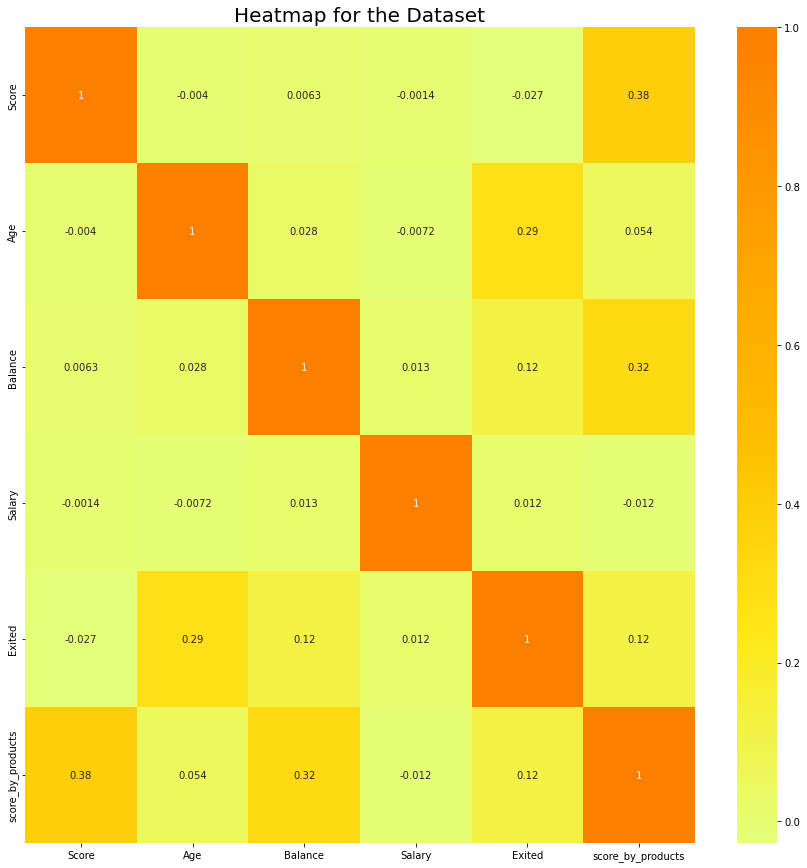

In [5]:
plt.rcParams['figure.figsize'] = (15, 15)

sns.heatmap(churn_data_set.drop(labels = ['Products','Card','Active','Tenure'] ,axis = 1).corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

## Análisis biserial puntual con las varibles card y active

In [6]:
alpha = 0.05


In [7]:
# Card vs Salary
p = pointbiserialr(churn_data_set.Card,churn_data_set.Salary)[1]
if p <= alpha:
    print('Se rechaza la hipótesis nula, por lo tanto las variables probablemente son dependientes')
else:
    print('no se rechaza la hipóteiss nula de que las variables son independientes')

no se rechaza la hipóteiss nula de que las variables son independientes


In [8]:
# Card vs Balance
p = pointbiserialr(churn_data_set.Card,churn_data_set.Balance)[1]
if p <= alpha:
    print('Se rechaza la hipótesis nula, por lo tanto las variables probablemente son dependientes')
else:
    print('no se rechaza la hipóteiss nula de que las variables son independientes')

no se rechaza la hipóteiss nula de que las variables son independientes


In [9]:
# Active vs Age
p = pointbiserialr(churn_data_set.Active,churn_data_set.Age)[1]
if p <= alpha:
    print('Se rechaza la hipótesis nula, por lo tanto las variables probablemente son dependientes')
else:
    print('no se rechaza la hipóteiss nula de que las variables son independientes')

Se rechaza la hipótesis nula, por lo tanto las variables probablemente son dependientes


In [10]:
# Score vs Age
p = pointbiserialr(churn_data_set.Active,churn_data_set.Score)[1]
if p <= alpha:
    print('Se rechaza la hipótesis nula, por lo tanto las variables probablemente son dependientes')
else:
    print('no se rechaza la hipóteiss nula de que las variables son independientes')

Se rechaza la hipótesis nula, por lo tanto las variables probablemente son dependientes


## Análisis entre varialbes categoricas

In [11]:
prob = 0.95

In [12]:
table = pd.crosstab(churn_data_set.Gender,churn_data_set.Active).to_numpy()
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
# interpretando el estadístico de prueba
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Se rechaza la hipótesis nula, por lo tanto las variables probablemente son dependientes')
else:
    print('no se rexhaza la hipóteiss nula de que las variables son independientes')

stat=4.992, p=0.025
Se rechaza la hipótesis nula, por lo tanto las variables probablemente son dependientes


In [13]:
table = pd.crosstab(churn_data_set.Tenure,churn_data_set.Active).to_numpy()
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
# interpretando el estadístico de prueba
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Se rechaza la hipótesis nula, por lo tanto las variables probablemente son dependientes')
else:
    print('no se rexhaza la hipóteiss nula de que las variables son independientes')

stat=14.030, p=0.172
no se rexhaza la hipóteiss nula de que las variables son independientes


In [14]:
table = pd.crosstab(churn_data_set.Tenure,churn_data_set.Score).to_numpy()
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
# interpretando el estadístico de prueba
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('Se rechaza la hipótesis nula, por lo tanto las variables probablemente son dependientes')
else:
    print('no se rexhaza la hipóteiss nula de que las variables son independientes')

stat=4610.767, p=0.412
no se rexhaza la hipóteiss nula de que las variables son independientes


# Análisis Multivariado

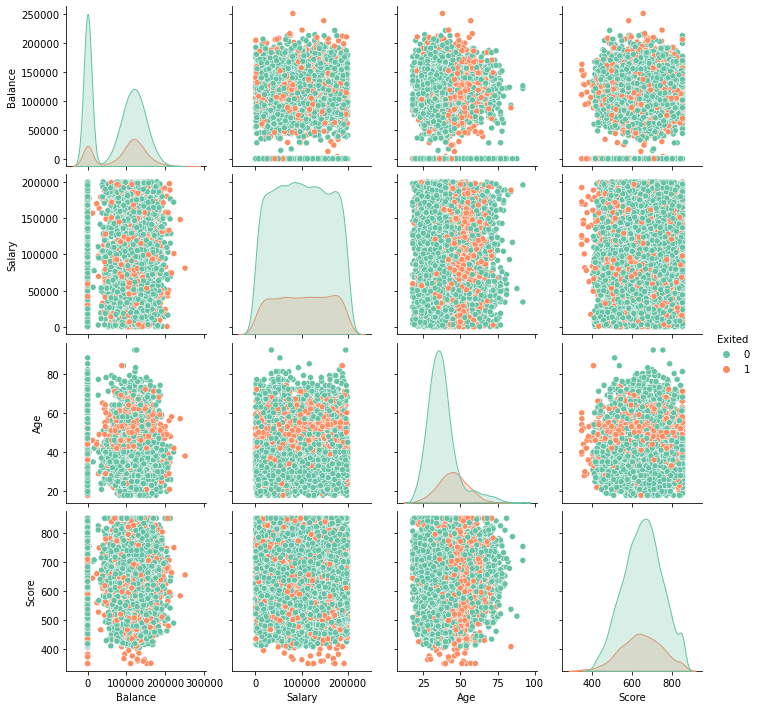

In [15]:
#Pairplot
sns.pairplot(churn_data_set,hue = 'Exited'  , palette = 'Set2', vars = ['Balance', 'Salary','Age','Score']);

Del gráfico anterior se puede observar que la gente de menor edad es menos propensa a desertar. 


## Análisis de la nacionalidad

In [16]:
churn_data_set.groupby('Nationality').size().reset_index(name='counts')

,Nationality,counts
0,France,5014
1,Germany,2509
2,Spain,2477


<AxesSubplot:xlabel='Nationality', ylabel='Salary'>

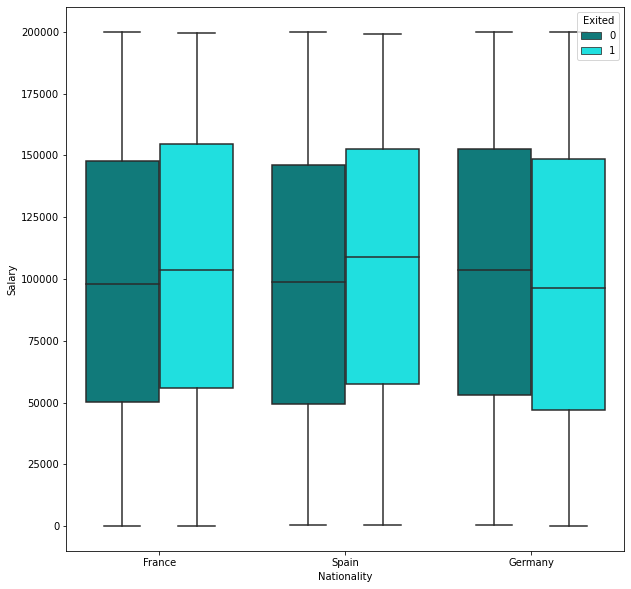

In [17]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(x='Nationality',y="Salary", hue = 'Exited',data=churn_data_set,palette=['#008B8B','#00FFFF'])

<AxesSubplot:xlabel='Nationality', ylabel='Balance'>

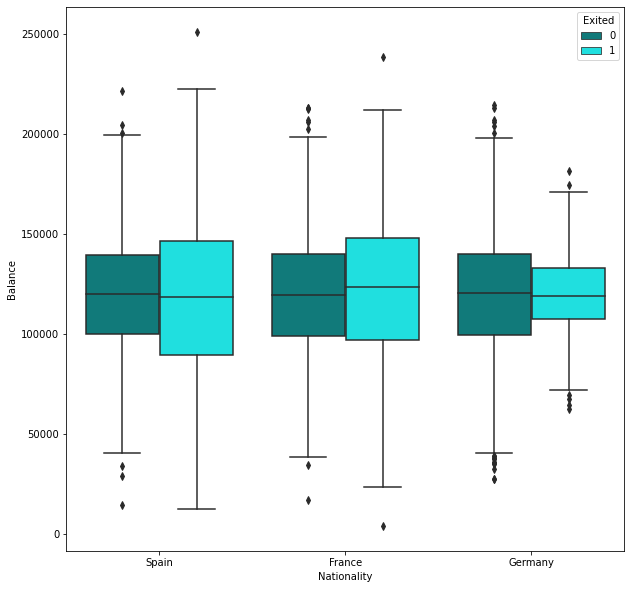

In [18]:
## Tengo en cuenta aquellos balances que no están en cero para tener una mejor visualización. 
## De otra manera se genera un sesgo ya que Alemania no tiene datos de balances en cero
plt.rcParams['figure.figsize'] = (10, 10)
sns.boxplot(x='Nationality',y="Balance", hue = 'Exited',data=churn_data_set.loc[churn_data_set['Balance'] != 0],palette=['#008B8B','#00FFFF'])

<AxesSubplot:xlabel='Nationality', ylabel='Age'>

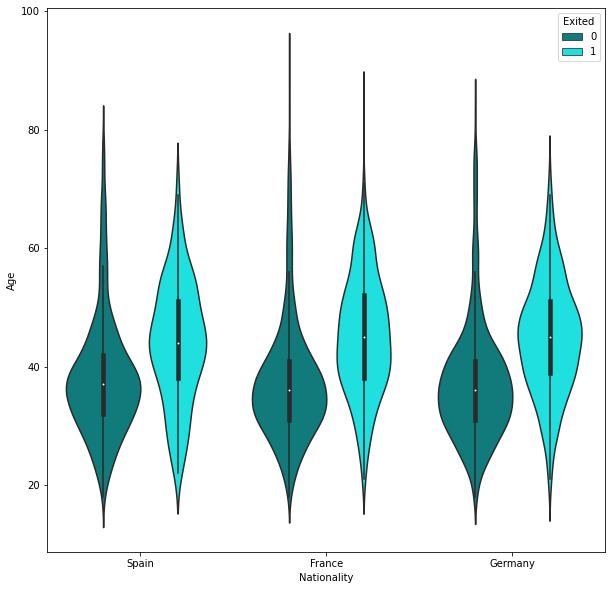

In [19]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(x='Nationality',y="Age", hue = 'Exited',data=churn_data_set.loc[churn_data_set['Balance'] != 0],palette=['#008B8B','#00FFFF'])

<AxesSubplot:xlabel='Nationality', ylabel='Score'>

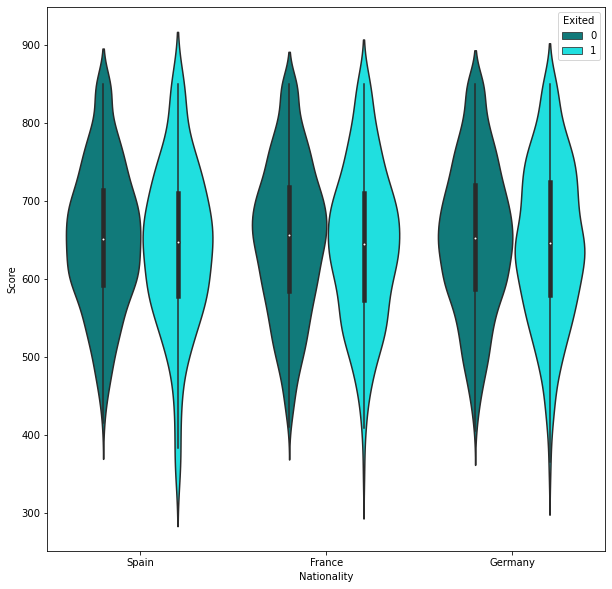

In [20]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.violinplot(x='Nationality',y="Score", hue = 'Exited',data=churn_data_set.loc[churn_data_set['Balance'] != 0],palette=['#008B8B','#00FFFF'])

- Es importante tener en cuenta que los franceses representan más del 50% del dataset.
- No parece que haya una realción apreciable entre los paises y la situación económica con la deserción 
- El patrón de edad de deserción parece ser el mismo en todos los paises



## Análisis de la variable Gender

In [21]:
churn_data_set.groupby('Gender').size().reset_index(name='counts')

,Gender,counts
0,Female,4543
1,Male,5457


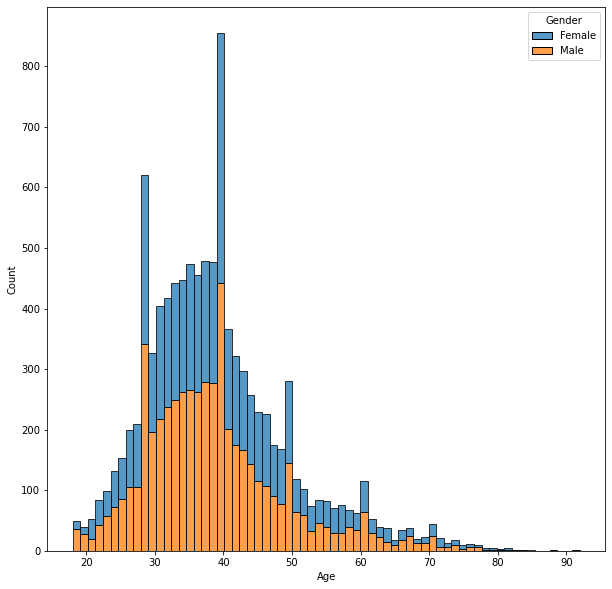

In [22]:
plt.rcParams['figure.figsize'] = (10, 10)
sns.histplot(data=churn_data_set, x="Age", hue="Gender", multiple="stack");

In [23]:
churn_data_set.groupby('Gender').describe()[['Salary','Balance','Tenure','Products','Age']].T

Gender                 Female           Male
Salary   count    4543.000000    5457.000000
         mean   100601.541382   99664.576931
         std     57371.034092   57628.130354
         min        91.750000      11.580000
         25%     51224.485000   50906.650000
         50%    101905.340000   98060.510000
         75%    148963.120000  149503.540000
         max    199992.480000  199953.330000
Balance  count    4543.000000    5457.000000
         mean    75659.369139   77173.974506
         std     62102.467293   62639.251138
         min         0.000000       0.000000
         25%         0.000000       0.000000
         50%     96147.550000   98064.970000
         75%    127141.785000  127900.030000
         max    238387.560000  250898.090000
Tenure   count    4543.000000    5457.000000
         mean        4.966102       5.051677
         std         2.910252       2.876726
         min         0.000000       0.000000
         25%         2.000000       3.000000
         50%         5.000000       5.000000
         75%         7.000000       8.000000
         max        10.000000      10.000000
Products count    4543.000000    5457.000000
         mean        1.544134       1.518600
         std         0.603254       0.562834
         min         1.000000       1.000000
         25%         1.000000       1.000000
         50%         1.000000       1.000000
         75%         2.000000       2.000000
         max         4.000000       4.000000
Age      count    4543.000000    5457.000000
         mean       39.238389      38.658237
         std        10.588588      10.396780
         min        18.000000      18.000000
         25%        32.000000      32.000000
         50%        38.000000      37.000000
         75%        45.000000      43.000000
         max        85.000000      92.000000

In [24]:
churn_data_set.groupby(['Gender','Card']).size().reset_index(name='counts')

,Gender,Card,counts
0,Female,0,1351
1,Female,1,3192
2,Male,0,1594
3,Male,1,3863


- La variable género parece tener una relación muy balanceada con el resto de las variables

## Análisis de la variable Age

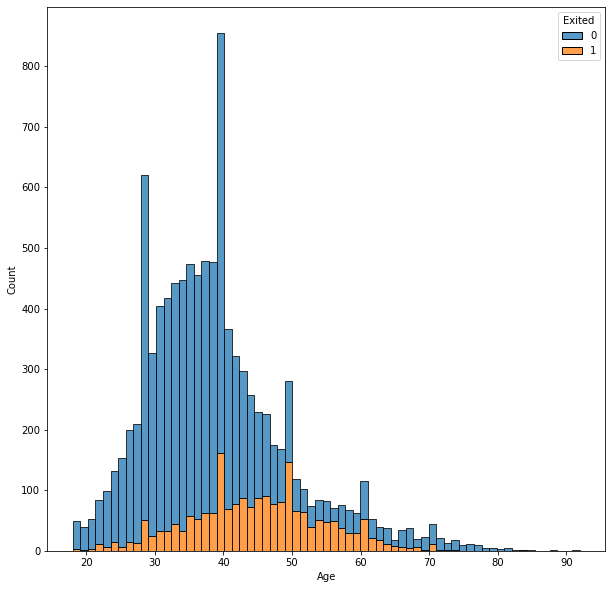

In [25]:
sns.histplot(data=churn_data_set, x="Age", hue="Exited", multiple="stack");

## Análisis de la variable Score

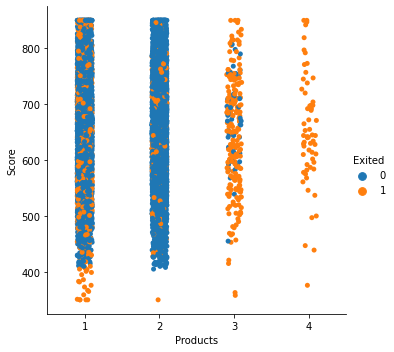

In [26]:
sns.catplot(x="Products", y="Score", data=churn_data_set, hue = 'Exited')

<AxesSubplot:xlabel='Exited', ylabel='score_by_products'>

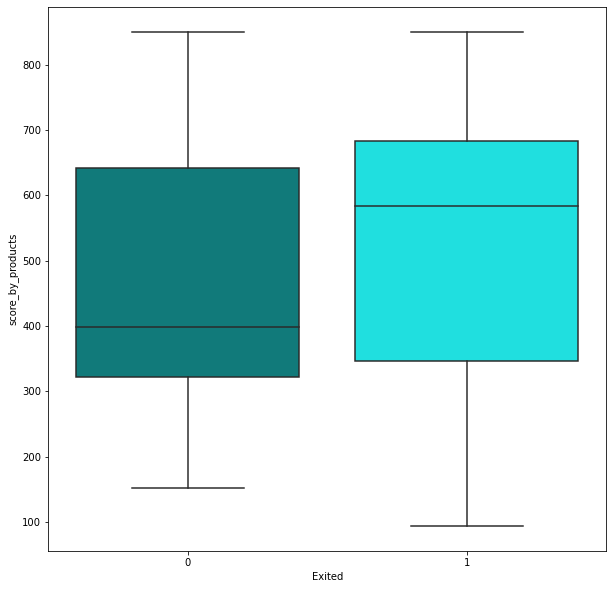

In [27]:
sns.boxplot(y="score_by_products", x = 'Exited',data=churn_data_set,palette=['#008B8B','#00FFFF'])

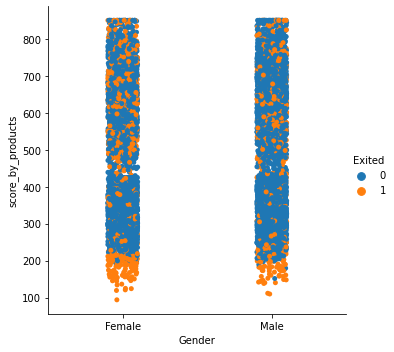

In [28]:
sns.catplot(x="Gender", y="score_by_products", data=churn_data_set, hue = 'Exited')

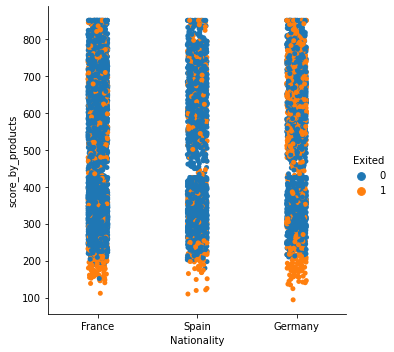

In [29]:
sns.catplot(x="Nationality", y="score_by_products", data=churn_data_set, hue = 'Exited')

- Se puede ver que la nueva variable score_by_product entre 300 y 400 tiene menos densidad de personas que han desertado

- Los análisis de correlación realizados con biserial puntual y chi-2 no muestran una relacion gráfica en los casos de resultados donde se marco una dependencia.


# PCA

In [30]:
churn_data_set.head()

,Score,Nationality,Gender,Age,Tenure,Balance,Products,Card,Active,Salary,Exited,score_by_products
Row,,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1,619.000000
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,608.000000
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,167.333333
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0,349.500000
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,850.000000


In [57]:
scale = StandardScaler()
scaled_data = scale.fit_transform(churn_data_set.drop(labels = ['Products','Card','Active','Tenure','Nationality','Exited','Gender'] ,axis = 1))


AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [62]:
pd.DataFrame(
    data    = scaled_data, # contiene el valor de los loadings  𝜙  que definen cada componente (eigenvector)
    columns = churn_data_set.drop(labels = ['Products','Card','Active','Tenure','Nationality','Exited','Gender'] ,axis = 1).columns, #Las columnas se corresponden con las variables de entrada.
    index   = churn_data_set.drop(labels = ['Products','Card','Active','Tenure','Nationality','Exited','Gender'] ,axis = 1).index#las filas se corresponden con las componentes principals (ordenadas de mayor a menor varianza explicada)
).describe()

,Score,Age,Balance,Salary,score_by_products
count,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,-4.870326e-16,2.484679e-16,-5.978551e-17,-1.580958e-17,-2.451817e-16
std,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00
min,-3.109504e+00,-1.994969e+00,-1.225848e+00,-1.740268e+00,-2.137027e+00
25%,-6.883586e-01,-6.600185e-01,-1.225848e+00,-8.535935e-01,-8.899382e-01
50%,1.522218e-02,-1.832505e-01,3.319639e-01,1.802807e-03,-2.364420e-01
75%,6.981094e-01,4.842246e-01,8.199205e-01,8.572431e-01,9.071763e-01
max,2.063884e+00,5.061197e+00,2.795323e+00,1.737200e+00,1.979999e+00


In [41]:
pca = PCA(n_components=5)
pca = pca.fit(scaled_data)

In [43]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = pca.components_, # contiene el valor de los loadings  𝜙  que definen cada componente (eigenvector)
    columns = churn_data_set.drop(labels = ['Products','Card','Active','Tenure','Nationality','Exited','Gender'] ,axis = 1).columns, #Las columnas se corresponden con las variables de entrada.
    index   = ['PC1', 'PC2', 'PC3','PC4','PC5'] #las filas se corresponden con las componentes principals (ordenadas de mayor a menor varianza explicada)
)

,Score,Age,Balance,Salary,score_by_products
PC1,0.535817,0.095931,0.456763,-0.008125,0.703562
PC2,-0.507317,0.697878,0.491226,0.116611,-0.026360
PC3,0.070250,0.328188,-0.173715,-0.925832,0.003836
PC4,0.398600,0.626923,-0.565059,0.358424,-0.018062
PC5,0.540105,0.054983,0.447880,-0.026505,-0.709905


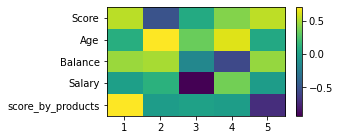

In [45]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2))
componentes = pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(churn_data_set.drop(labels = ['Products','Card','Active','Tenure','Nationality','Exited','Gender'] ,axis = 1).columns)), churn_data_set.drop(labels = ['Products','Card','Active','Tenure','Nationality','Exited','Gender'] ,axis = 1).columns)
plt.xticks(range(len(churn_data_set.drop(labels = ['Products','Card','Active','Tenure','Nationality','Exited','Gender'] ,axis = 1).columns)), np.arange(pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [46]:
# Se calcular el ratio de varianza explicada por componente
print(pca.explained_variance_ratio_)

[0.30138009 0.20391549 0.20102182 0.19326016 0.10042243]


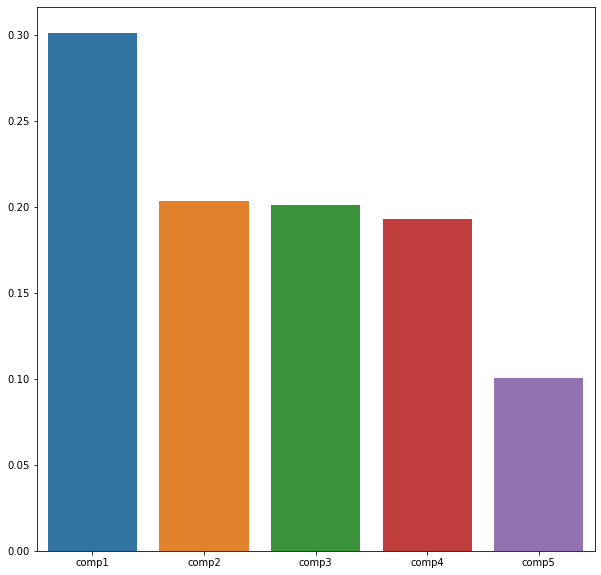

In [48]:
sns.barplot(x=['comp1','comp2','comp3','comp4','comp5'],y=pca.explained_variance_ratio_);

In [52]:
proyecciones = pca.transform(scaled_data)
proyecciones = pd.DataFrame(
    proyecciones,
    columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],
    index   = churn_data_set.drop(labels = ['Products','Card','Active','Tenure','Nationality','Exited','Gender'] ,axis = 1).index
)
proyecciones.head()

,PC1,PC2,PC3,PC4,PC5
Row,,,,,
1,-0.198752,-0.248312,0.268867,0.741461,-1.222232
2,0.300912,0.426974,-0.184197,-0.051823,-0.649989
3,-1.410905,1.713183,-0.472705,-1.064154,1.010355
4,-0.814191,-0.844440,0.348607,0.871686,0.254461
5,2.898079,-0.484476,0.481899,0.455788,0.092077


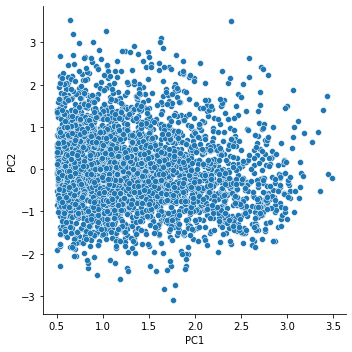

In [56]:
sns.relplot(data=proyecciones[proyecciones.PC1>0.5], x="PC1", y="PC2");